# Optimización de funciones escalares diferenciables con `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px"/>

- Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones.
- La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
- Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
- El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml



<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px"/>

### Algunas aplicaciones son:

1. **Ingeniería:**
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
 - Análisis conformacional - Isomería conformacional en modelado molecular
 - Desempeño en fermentación de productos.
 - Estimación de parámetros en bioquímica e ingeniería metabólica.


2. **Distribución óptima de recursos:**
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.


3. **Optimización financiera:**
 - Administración de riesgos.
 - Portafolios de inversión.
 - Problema de maximización de la utilidad.
 - la calibración de modelos de precios de opciones para datos de mercado
 - la optimización de la función de utilidad de un agente

### <p style="color:green;">En esta clase veremos aspectos básicos de optimización. Específicamente, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).</p>

<img style="float: center" src="https://matematicasies.com/local/cache-vignettes/L337xH278/extremos-77d0a.png" width="400px"/>

## Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$ y si la derivada $f'(c)$ existe en el valor $c$, entonces $f'(c) = 0$.

Sin embargo, si $f'(c)=0$ no implica la existencia de un punto crítico.

### Metodología
1. Definir el criterio de optimización.
    1. Definiendo una variable simbólica o
    2. desde el entorno `def`.
2. Derivar la función a optimizar.
3. Encontrar la raíz de la derivada.
4. Definir qué puntos son máximos o mínimos.
    1. Usando el criterio de la segunda derivada o
    2. evaluando numéricamente (método gráfico).

### Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f'(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f''(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f''(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f''(c)=0$, entonces el criterio no decide.

### Ejemplo

Sabemos que la función $f(x)=(x-2)^2$ tiene un mínimo global en $x=2$, pues

$$f(x)=(x-2)^2\geq0,\qquad\text{y}\qquad f(x)=(x-2)^2=0 \qquad\text{si y solo si}\qquad x=2.$$

In [ ]:
import sympy as sym

In [ ]:
# Paso 1
x = sym.var('x')
f = (x-2)**2
f

(x - 2)**2

In [ ]:
# Paso 2
df=f.diff()      # Si no especifico ningun argumento, toma la única variable simbólica
# df=sym.diff(f) # Esto es lo mismo
df

2*x - 4

In [ ]:
# Paso 3
c=sym.solve(df,x) # puntos críticos
c

[2]

In [ ]:
# Paso 4. Criterio de la segunda derivada
df2=df.diff()
df2           # Segunda derivada positiva. 'x'=2, se trata de un mínimo

2

Notita:

Si el criterio de la segunda derivada es concluyente, damos por terminado el ejercicio. Sinembarguísimo, graficaremos para depejar algunos detalles.

In [ ]:
# Gráfica
sym.plot(f,(x,-1,5),title='f(x)=(x-2)^2') # Graficamos un rango de +-3 después del punto crítico

In [ ]:
# Usando matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Convertimos la variable simbólica 'f' a una función para evaluar datos numéricos
# f(0) <- esto marca error :o
f_num = sym.lambdify(x,f,'numpy')
f_num(0)

4

In [ ]:
f_num(np.array([0,2,3]))

array([4, 0, 1])

In [ ]:
# Definimos el arreglo numérico en donde queremos graficar
x_num = np.linspace(-1,5,100)

# Evaluamos la función en 'x_num'
y_num = f_num(x_num)

# Gráfica
plt.plot(x_num,y_num)
plt.plot(c[0],f_num(c[0]),'ro') # Ahí está el puntito
plt.grid()

---
Otra forma de hacer lo mismo (solo para criterios que no usen funciones matemáticas).

In [ ]:
# Criterio de optimización
def f(x):
  return (x-2)**2

In [ ]:
f(0)

4

In [ ]:
f(x)

(x - 2)**2

In [ ]:
f(np.array([0,1,2,3]))

array([4, 1, 0, 1])

In [ ]:
# Derivamo'
df=sym.diff(f(x)) # En este caso usamos 'f(x)' en lugar de 'f'
df

2*x - 4

In [ ]:
c=sym.solve(df,x)
c

[2]

In [ ]:
# Gráfica
x_num=np.linspace(-1,5,100)
y_num=f(x_num)              # Ahora usamos 'f(x_num)'
plt.plot(x_num,y_num)
plt.plot(c[0],f(c[0]),'rx',ms=10) # Evaluamos el punto crítico en 'f'
plt.grid()

### Actividad
Considere $g(x)=(x-2)^3$.
- Usando `sympy`, muestre que $g'(2)=0$.
- Sin embargo, descartar que $x=2$ es un extremo de $g(x)$ viendo su **gráfica**.

In [ ]:
# Usar el criterio de la segunda derivada
import sympy as sym

def g(x):
  return (x-2)**3

dg=sym.diff(g(x))
dg

dg2=sym.diff(dg)
dg2

c=sym.solve(dg2,x)
c

dg2.subs(x,c[0])

#sabemos que 2 es un cero, por lo tanto elegimos límites alrededor de el 2 para ver que no sea un extremo:
x=np.linspace(1,3,100)
y=g(x)
plt.plot(x,y)
plt.plot(c[0],g(c[0]),'r*',ms=8)
plt.grid()

### ~Actividad~

¿Qué pasa con $h(x)=(x-2)^4$ al intentar utilizar el criterio de la segunda derivada?.

In [1]:
# importamos las librerías
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos la variable simbólica y la función
x=sym.var('x')
def h(x):         # Usando el entorno 'def', 'h' acepta argumentos simbólicos, numéricos y arreglos de numpy
  return (x-2)**4

h(x)

(x - 2)**4

In [3]:
dh=h(x).diff() # Derivamos el resultado que nos regresa la función
c=sym.solve(dh,x) # Encontramos los puntos críticos
c

[2]

In [5]:
ddh=dh.diff() # Evaluamos la segunda derivada
ddh.subs(x,c[0]) # El criterio de la segunda derivada es no concluyente

0

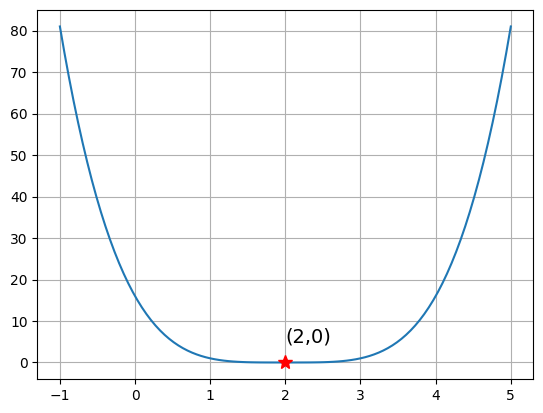

In [12]:
# Entonces, graficamos
x_num=np.linspace(-1,5,100)   # Rango de la gráfica en +-3 del punto crítico
y_num=h(x_num)
plt.plot(x_num,y_num)
plt.plot(c[0],h(c[0]),'r*',ms=10)
plt.text(c[0],h(c[0])+5,f'({c[0]},{h(c[0])})',fontsize=14) # Argumentos de 'text': coordenadas en 'x' y 'y', texto, atributos del texto. En este caso estamos usando texto con formato donde se incluyen las variables entre llaves -> {var}, para que en el texto tome el valor de ésta.
plt.grid()

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-2x+5$ en $\left[0,3\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,3\right]$:

In [ ]:
def f(x):
  return x**2-2*x+5
f(x)

In [ ]:
df=sym.diff(f(x))
c=sym.solve(df,x)
c

In [16]:
puntos=np.array([0,1,3]) # Puntos a evaluar

In [17]:
f(puntos)

array([5, 4, 8])

Comparando los valores obtenidos, vemos que el punto en $x=1$ se trata de un mínimo.

---

### Actividad
Determinar los valores extremos absolutos de  $f(x) = (x-3)^2(x+3)^2$ en el intervalo $[1,\,4]$, usando `sympy`. Mostrar en una gráfica.

In [18]:
def f(x):
  return (x-3)**2*(x+3)**2
f(x)

(x - 3)**2*(x + 3)**2

In [19]:
df=f(x).diff()
c=sym.solve(df,x)
c #solo 3 está dentro del rango

[-3, 0, 3]

In [21]:
puntos=np.array([1,c[2],4])
f(puntos)

array([64, 0, 49], dtype=object)

Por lo que $x=3$ es un mínimo.

---

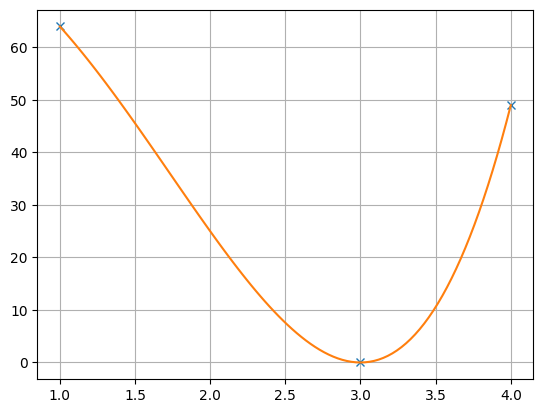

In [24]:
plt.plot(puntos,f(puntos),'x')
x_num=np.linspace(1,4,100)
y_num=f(x_num)
plt.plot(x_num,y_num)
plt.grid()

### Cambio de librerías
Uso de funciones entre librerías `NumPy` y `SymPy`

$$
f(x)=e^{-x}\cos(2x),
$$
para $x\in[-1,1]$.

In [ ]:
# Definimos 'f' como una variable y no usando el entorno 'def'
x=sym.var('x')
f=sym.exp(-x)*sym.cos(2*x) # Usamos la exponencial y el coseno de SymPy
f

In [ ]:
# Derivamos
df=f.diff()
df

In [ ]:
# Encontramos los puntos críticos
c=sym.solve(df,x)
c[0],float(c[0]) # Convertimos el punto crítico a flotante

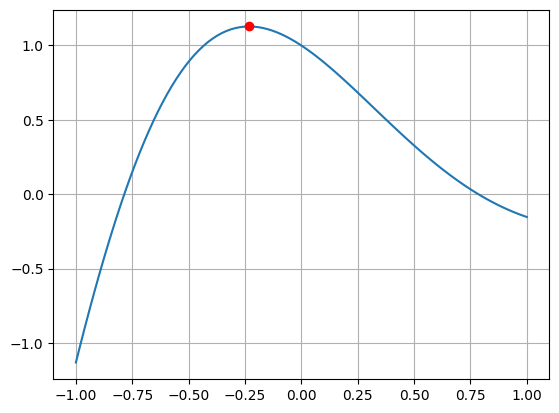

In [31]:
# Graficamos
#
# Convertimos la variable simbólica 'f' a una función que acepte arreglos de NumPy
f_num = sym.lambdify(x,f,'numpy')
#
x_num = np.linspace(-1,1,100)
y_num = f_num(x_num)
plt.plot(x_num,y_num)
plt.plot(float(c[0]),f_num(float(c[0])),'ro') # Convertimos el punto crítico a float
plt.grid()

In [32]:
# Usemos funciones de NumPy
def f(x):                       # Esto de acá nada más nos servirá para graficar
  return np.exp(-x)*np.cos(2*x)

```python
sym.diff(f(x),x) # Esto marca error :(
```

### Otra función a optimizar (con puntos críticos complejos)
$$
f(x)=(x^2+1)^2(x-1)^2
$$

In [34]:
# Como 'f(x)' está expresado en potencias, nos conviene usar el entorno 'def'
def f(x):
  return (x**2+1)**2*(x-1)**2
f(x)

(x - 1)**2*(x**2 + 1)**2

In [36]:
df=sym.diff(f(x),x)
c=sym.solve(df,x)
c                   # Tenemos puntos críticos complejos :o

[1, -I, I, 1/3 - sqrt(2)*I/3, 1/3 + sqrt(2)*I/3]

In [38]:
x=sym.var('x',real=True) # Definimos 'x' como real
df=sym.diff(f(x),x)
c=sym.solve(df,x)        # Encontramos los puntos críticos reales
c

[1]

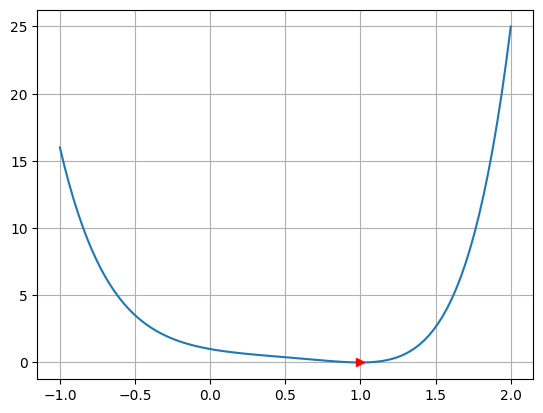

In [40]:
x_num=np.linspace(-1,2,100)
plt.plot(x_num,f(x_num))
plt.plot(c[0],f(c[0]),'r>')
plt.grid()

In [41]:
f(c[0])

0

Observando la gráfica, concluímos que $x=1$ se trata de un mínimo en $f(x)=0$.

---
1. **Resistencia de una viga**  Una viga de madera tiene una sección transversal rectangular de altura $h$ y ancho $w$. La resistencia $S$ de la viga es directamente proporcional al ancho y al cuadrado de su altura ($S=kwh^2$, donde $k$ es una constante de proporcionalidad). ¿Cuáles son las dimensiones de la viga más fuerte que puede cortarse a partir de un leño redondo de $24$ pulgadas de diámetro?

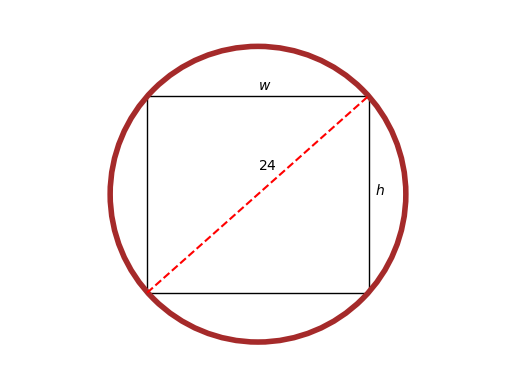

In [ ]:
#@markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C = patches.Circle((0, 0),12, fill=False,color='brown',lw=4)
S = patches.Rectangle((-9,-8),18,16,fill=False,color='k')
ax = plt.gca()
ax.add_artist(S)
ax.add_artist(C)

plt.text(0,8.5,'$w$')
plt.text(9.5,0,'$h$')

plt.plot([-9,9],[-8,8],'r--')
plt.text(0,2,'$24$')

plt.axis('equal')
plt.ylim([-15,15])
plt.axis('off')
plt.show()

**Deducción del criterio de optimización**:

Se desea maximizar la resistencia $S=kwh^2$. Para conseguirlo, se sustituye la altura ($h$) usando el teorema de Pitágoras del triángulo rectángulo que se forma con el diámetro del circulo:
$$
\max_{w}S(w)=\max_ww(24^2-w^2),
$$
para positivo y $w<24$.

In [42]:
k=1.3e4
def S(w):
  return k*w*(24**2-w**2)
w=sym.var('w',positive=True)
S(w)

13000.0*w*(576 - w**2)

In [43]:
dS=sym.diff(S(w),w)
c=sym.solve(dS,w)
c                 # Ancho óptimo

[13.8564064605510]

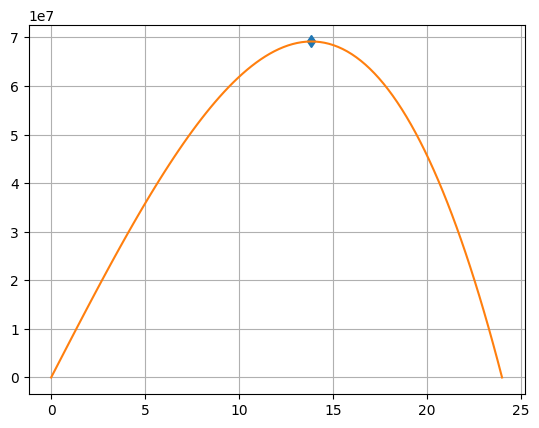

In [45]:
plt.plot(c[0],S(c[0]),'d')
w_num=np.linspace(0,24,100)
plt.plot(w_num,S(w_num))
plt.grid()

In [49]:
# Calculamos la altura óptima
(24**2-c[0]**2)**0.5  # Teorema de Pitágoras

19.5959179422654

In [47]:
# Resistencia máxima obtenida
S(c[0])

69171181.0510707

**Resultado:**

Las dimensiones óptimas son $w=13.8564$ y $h=19.5959$ pulgadas, obteniendo una resistenacia máxima de $69171181$ unidades de resistencia.

---

---
2. **Iluminación**  Una fuente luminosa se localiza sobre el centro de una mesa circular de $4 pies$ de diámetro. Encontrar la altura $h$ de la fuente luminosa de modo tal que la iluminación $I$ en el perímetro de la mesa sea máxima si $I=k(\sin \alpha)/s^2$, donde $s$ es la altura oblicua, $\alpha$ es el ángulo al cual la luz incide sobre la mesa y $k$ es una constante (El valor de esta última constante es irrelevante para el problema, ya que no se pide el valor de la iluminación).

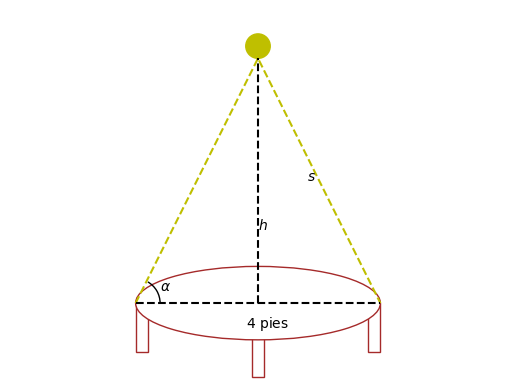

In [ ]:
#@markdown
E = patches.Ellipse((0, 0),10, 3,fc='white',ec='brown')
C = patches.Circle((0,10.5),0.5,color='y')
a = patches.Arc((-5,0),2,2,theta2=60)
p1 = patches.Rectangle((-5, -2),0.5, 2, fill=False,color='brown')
p2 = patches.Rectangle((4.5, -2),0.5, 2, fill=False,color='brown')
p3 = patches.Rectangle((-0.25, -3),0.5, 2, fill=False,color='brown')
ax = plt.gca()
ax.add_artist(p1)
ax.add_artist(p2)
ax.add_artist(p3)
ax.add_artist(E)
ax.add_artist(C)
ax.add_artist(a)

plt.text(2,5,'$s$')
plt.text(0,3,'$h$')
plt.text(-4,0.5,r'$\alpha$')
plt.text(-0.5,-1,'$4$ pies')

plt.plot([-5,0,5],[0,10,0],'y--')
plt.plot([-5,5],[0,0],'k--')
plt.plot([0,0],[0,10],'k--')


plt.axis('equal')
plt.ylim([-3.1,12])
plt.axis('off')
plt.show()

3. **Fuerza mínima**  Se diseña un componente para deslizar un bloque de acero con peso $W=10 N$ a través de una mesa y sobre una canaleta. Se opone al movimiento del bloque una fuerza de fricción proporcional a su peso aparente (sea $k=0.1$ la constante de proporcionalidad). Determinar la fuerza mínima $f$ necesaria para deslizar el bloque y encontrar el valor correspondiente de $\theta$.

Ayudín: $f\cos \theta$ es la fuerza de dirección del movimiento, y $f\sin\theta$ es la fuerza que tiende a levantar el bloque. De tal modo, el peso aparente del bloque es $W-f\sin\theta$.

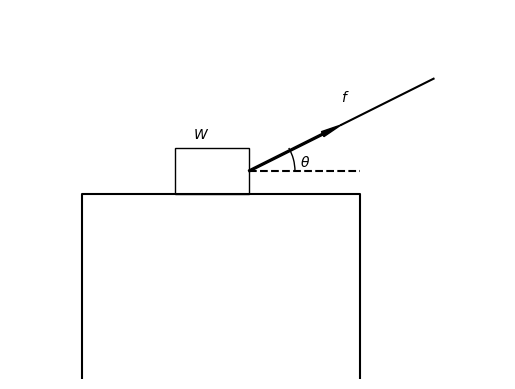

In [ ]:
#@markdown
W = patches.Rectangle((0, 2),0.8, 0.5, fill=False,color='k')
a = patches.Arrow(0.8,2.25,1,0.5,width=0.1,color='k')
arc = patches.Arc((0.8,2.25),1,1,theta2=30)
ax = plt.gca()
ax.add_artist(W)
ax.add_artist(a)
ax.add_artist(arc)

plt.text(0.2,2.6,'$W$')
plt.text(1.8,3,'$f$')
plt.text(1.35,2.305,r'$\theta$')

plt.plot([1.8,2.8],[2.75,3.25],'k')
plt.plot([0.8,2],[2.25,2.25],'k--')
plt.plot([-1,-1,2,2],[0,2,2,0],'k')


plt.axis('equal')
plt.ylim([0,4])
plt.axis('off')
plt.show()

**Volumen de una caja**  Para elavorar una caja, una fábrica dispone de láminas de cartón cuadradas de 13 unidades por lado, a las cuales se les recorta un cuadrado en cada extremo. ¿Qué longitud debe tener el del cuadrado del recorte para que la caja costruida contenga el máximo volumen posible?

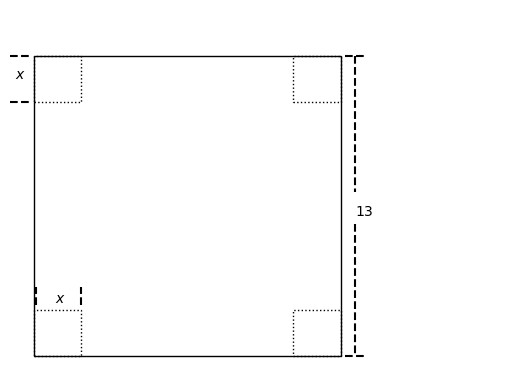

In [ ]:
#@markdown
import matplotlib.pyplot as plt
from matplotlib import patches
S1 = patches.Rectangle((0, 0),13,13, fill=False,color='k')
c1 = patches.Rectangle((11,0),2,2,fill=False,color='k',ls=':')
c2 = patches.Rectangle((0,0),2,2,fill=False,color='k',ls=':')
c3 = patches.Rectangle((11,11),2,2,fill=False,color='k',ls=':')
c4 = patches.Rectangle((0,11),2,2,fill=False,color='k',ls=':')
ax = plt.gca()
ax.add_artist(S1)
ax.add_artist(c1)
ax.add_artist(c2)
ax.add_artist(c3)
ax.add_artist(c4)

plt.text(-0.8,12,'$x$')
plt.plot([-1,-0.2],[11,11],'k--')
plt.plot([-1,-0.2],[13,13],'k--')
plt.text(0.9,2.3,'$x$')
plt.plot([0.1,0.1],[2.2,3],'k--')
plt.plot([2,2],[2.2,3],'k--')

plt.plot([13.2,14],[0,0],'k--')
plt.plot([13.2,14],[13,13],'k--')
plt.plot([13.6,13.6],[13,7.1],'k--')
plt.text(13.6,6.1,'$13$')
plt.plot([13.6,13.6],[5.7,0],'k--')

plt.axis([-1,20,-1,15])
#plt.axis('equal')
plt.axis('off')
plt.show()

---
**Minimización del tiempo.** Un barco encalló en el punto **P** a $9 km$ del punto más próximo a la costa en línea recta. Se necesita enviar a un mensajero a un pueblo situado en la orilla de la costa a 15 km de **P**. Teniendo en cuenta que el mensajero recorre a pie $5 km/h$, y en una barca a $4 km/h$, decir en qué punto de la orilla debe desembarcar para llegar al pueblo lo más pronto posible?

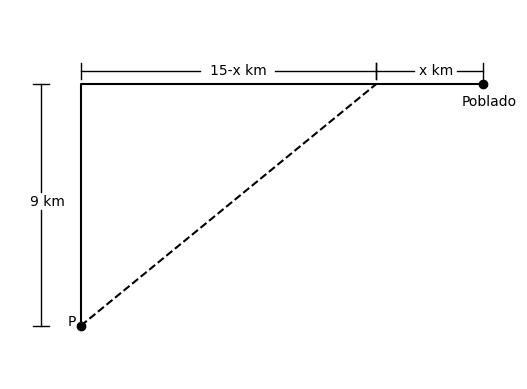

In [ ]:
#@markdown
import matplotlib.pyplot as plt
def dim(p1,p2,txt):
    vertical=p1[0]-p2[0]==0
    plt.plot([p1[0]-0.3*vertical,p1[0]+0.3*vertical],[p1[1]-0.3*(1-vertical),p1[1]+0.3*(1-vertical)],'k',
             [p2[0]-0.3*vertical,p2[0]+0.3*vertical],[p2[1]-0.3*(1-vertical),p2[1]+0.3*(1-vertical)],'k',
             [min(p1[0],p2[0]),(p1[0]+p2[0])/2-0.15*len(txt)*(1-vertical)],[min(p1[1],p2[1]),(p1[1]+p2[1])/2-0.2*vertical],'k',
             [max(p1[0],p2[0]),(p1[0]+p2[0])/2+0.25*len(txt)*(1-vertical)],[max(p1[1],p2[1]),(p1[1]+p2[1])/2+0.5*vertical],'k',lw=1)
    plt.text((p1[0]+p2[0])/2-len(txt)*0.1,(p1[1]+p2[1])/2-0.15*(1-vertical),txt)

plt.plot([0,0,15],[0,9,9],'k',
         [0,11],[0,9],'--k',
         [0,15],[0,9],'ok')
plt.text(-0.5,0,'P')
plt.text(14.2,8.2,'Poblado')
dim((-1.5,9),(-1.5,0),'9 km')
dim((0,9.5),(11,9.5),'15-x km')
dim((11,9.5),(15,9.5),'x km')

plt.axis('equal')
ax=plt.axis('off')